In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
df = pd.read_csv('cereal.csv')

In [11]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


#### a.1) se existe um equilíbrio no percentual de caloria adicionado pelos fornecedores

In [73]:
novo_df = df[['name', 'fat', 'sugars']].copy()

In [75]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Adiciona colunas com calorias por componente

## Essa multiplicação segue os valores calóricos padrão dos macronutrientes, com base em diretrizes nutricionais reconhecidas (como da FAO/OMS ou FDA):
novo_df['Cal_Gordura'] = novo_df['fat'] * 9
novo_df['Cal_Açúcar'] = novo_df['sugars'] * 4

# Caloria total por fornecedor
novo_df['Cal_Total'] = novo_df['Cal_Gordura'] + novo_df['Cal_Açúcar']

# Soma total de calorias do dataset
total_cal = novo_df['Cal_Total'].sum()

# Percentual de calorias por fornecedor
novo_df['%_Caloria'] = (novo_df['Cal_Total'] / total_cal) * 100

# Mostrar resultado
print(novo_df[['name', 'Cal_Total', '%_Caloria']])

# Identificar fornecedor com maior e menor % de caloria
fornecedor_max = novo_df.loc[novo_df['%_Caloria'].idxmax()]
fornecedor_min = novo_df.loc[novo_df['%_Caloria'].idxmin()]

                                      name  Cal_Total  %_Caloria
0                                100% Bran         33   1.164432
1                        100% Natural Bran         77   2.717008
2                                 All-Bran         29   1.023289
3                All-Bran with Extra Fiber          0   0.000000
4                           Almond Delight         50   1.764291
5                  Apple Cinnamon Cheerios         58   2.046577
6                              Apple Jacks         56   1.976006
7                                  Basic 4         50   1.764291
8                                Bran Chex         33   1.164432
9                              Bran Flakes         20   0.705716
10                            Cap'n'Crunch         66   2.328864
11                                Cheerios         22   0.776288
12                   Cinnamon Toast Crunch         63   2.223006
13                                Clusters         46   1.623147
14                       

In [76]:
print("\n📈 Fornecedor com MAIOR % de caloria:")
print(fornecedor_max[['name', '%_Caloria']])

print("\n📉 Fornecedor com MENOR % de caloria:")
print(fornecedor_min[['name', '%_Caloria']])


📈 Fornecedor com MAIOR % de caloria:
name         100% Natural Bran
%_Caloria             2.717008
Name: 1, dtype: object

📉 Fornecedor com MENOR % de caloria:
name         All-Bran with Extra Fiber
%_Caloria                          0.0
Name: 3, dtype: object


#### a.2) quais são os fornecedores que têm maior percentual de caloria, assim como o menor, relacionado ao tipo; 

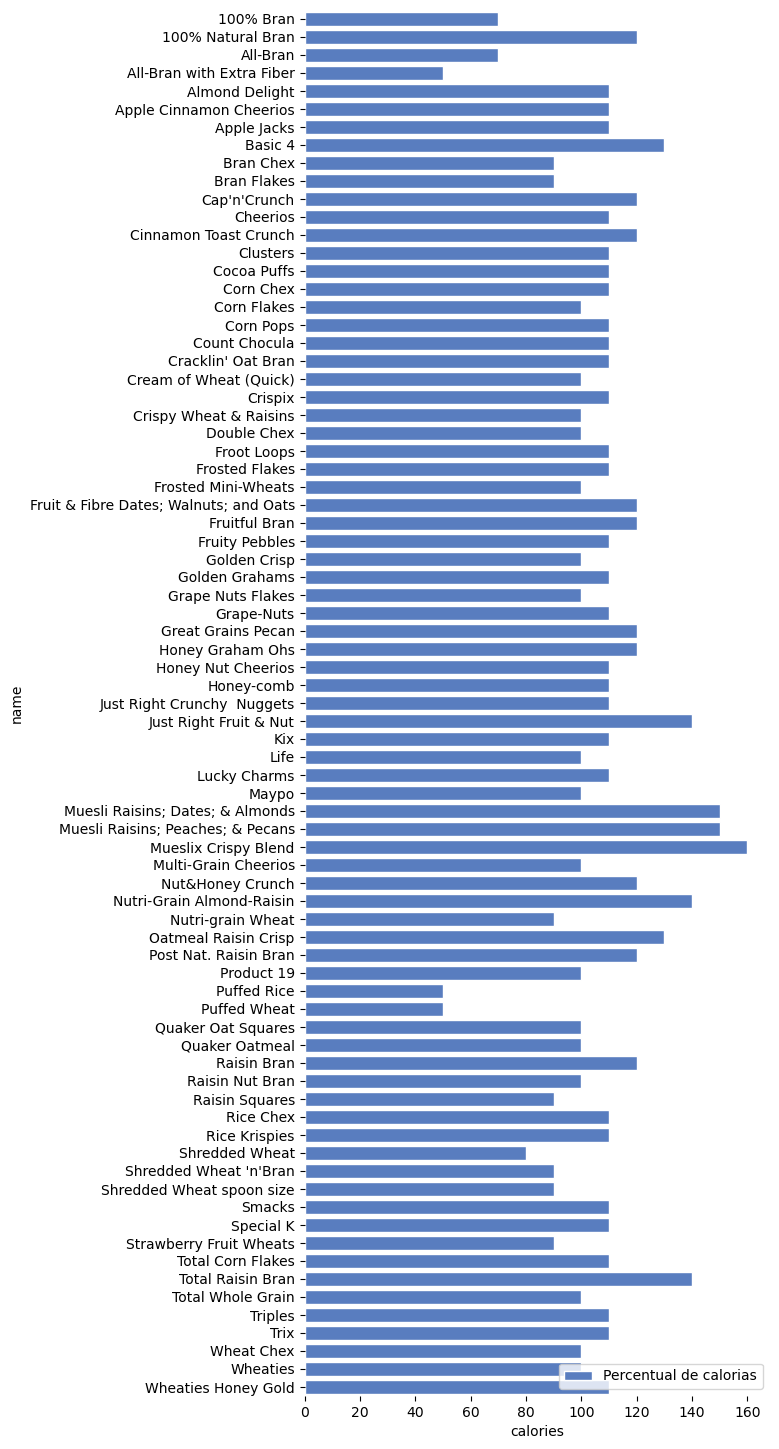

In [77]:
f, ax = plt.subplots(figsize = (6, 18))
sns.set_color_codes('pastel')
sns.set_color_codes('muted')
sns.barplot(x = 'calories', y = 'name', data = df,
           label = 'Percentual de calorias', color = 'b', edgecolor = 'w')
ax.legend(ncol = 1, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

#### b) os níveis de gorduras e açúcar de cada fornecedor.

In [78]:
novo_df.head()

,name,fat,sugars,Cal_Gordura,Cal_Açúcar,Cal_Total,%_Caloria
0,100% Bran,1,6,9,24,33,1.164432
1,100% Natural Bran,5,8,45,32,77,2.717008
2,All-Bran,1,5,9,20,29,1.023289
3,All-Bran with Extra Fiber,0,0,0,0,0,0.000000
4,Almond Delight,2,8,18,32,50,1.764291


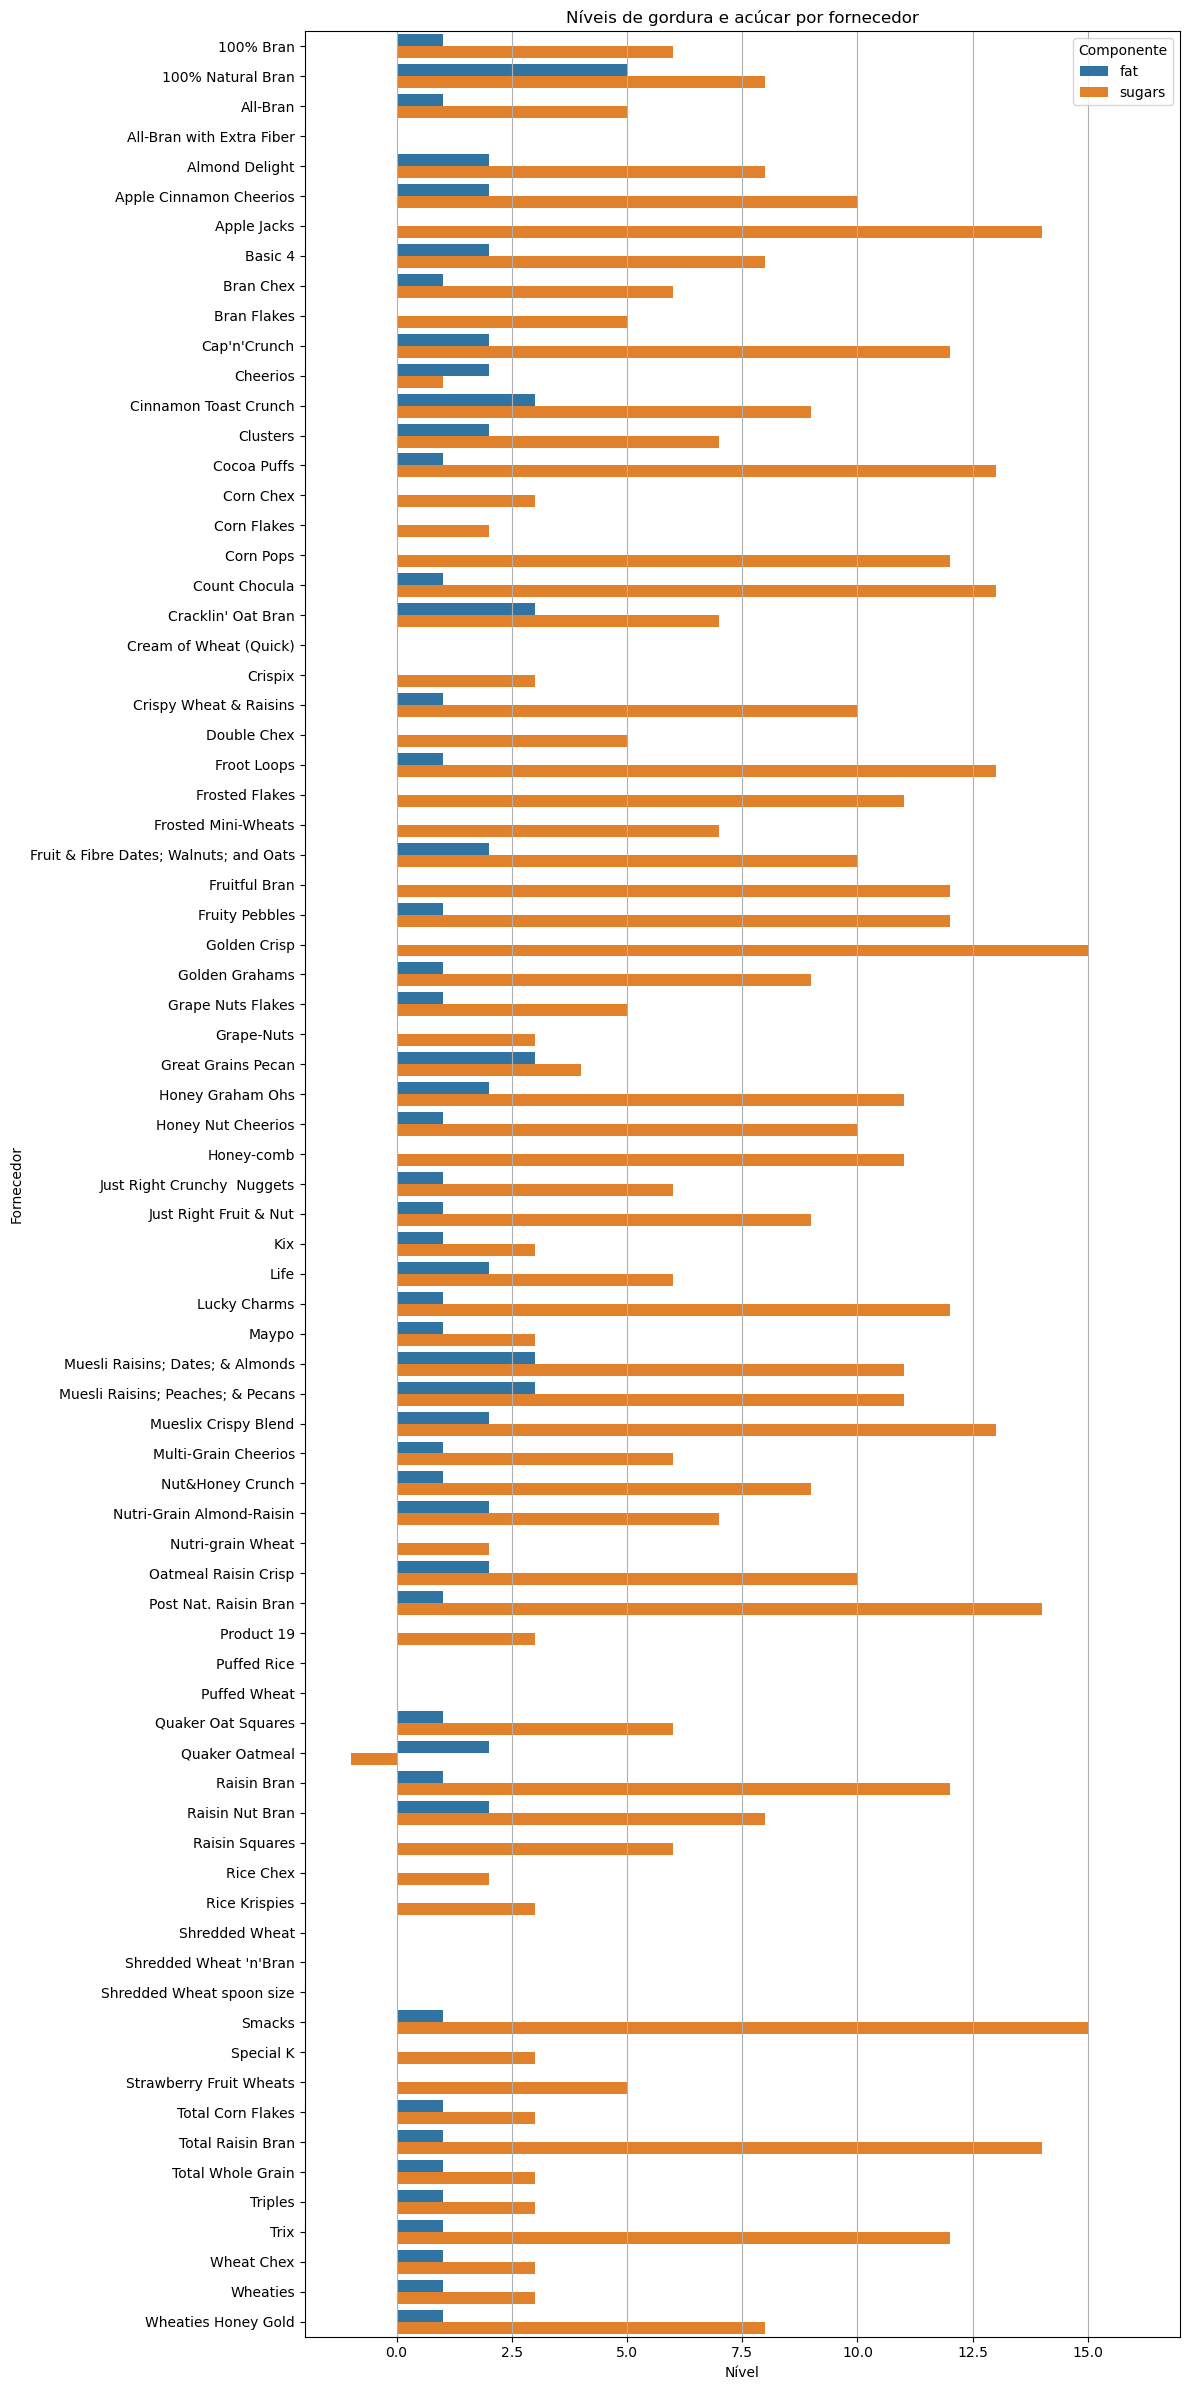

In [67]:
df_long = novo_df.melt(id_vars='name', value_vars=['fat', 'sugars'],
                  var_name='Componentes', value_name='Nível')

plt.figure(figsize=(12,24))
sns.barplot(data=df_long, y='name', x='Nível', hue='Componentes')

plt.xlim(-2, 17)

plt.title("Níveis de gordura e acúcar por fornecedor")
plt.xlabel("Nível")
plt.ylabel("Fornecedor")
plt.grid(True, axis='x')
plt.legend(title="Componente")
plt.tight_layout()
plt.show()